In [1]:
import numpy as np
import pandas as pd

In [2]:
archivo= pd.read_csv("C:\\Users\\usuario\\Desktop\\cursado Henry\\M1\\Clase 04\\Titanic.csv")

In [3]:
df= pd.DataFrame(archivo)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


descripcion del dataset


- PassengerId: Muestra el Id del pasajero(es un indicador)
- Survived: 0 si murio,
            1 si sobrevivio
- Pclass: la clase del pasajero: -1ra
                                 -2da
                                 -3ra
- Name:  nombre del pasajero
- Sex: sexo del pasajero
- Age: edad del pasajero 
- SibSp: numero de parientes como hermano,hermana,hermanastra,hermanastro,esposo,esposa.
- Parch: Numero de parientes como madre,padre,hijo,hija,hijastro,hijastra.
- ticket: numero de boleto
- Fare: tarifa del pasaje
- Cabin: numero de cabina del pasajero
- embarked: Muestra los datos del puerto de embarcadero:
        C= Cherbourg,
        Q= Queenston,
        S= Southampton.

 ### BUSCAMOS VALORES NULOS Y DUPLICADOS


In [6]:

indices, datos= np.where(df.isnull())
## indices contiene los indices de los registros donde encontramos valores nulos(columnas por asi decirlo)
## datos contiene el index de la posicion de cada dato nulo en su registro correspondiente.
len(indices) ## cantidad de  valores nulos
np.unique(datos, return_counts= True) ## indices en cada registro donde se encuentran valores nulos(podriamos decir las columnas/campos que tienen valores nulos), y su frecuencia acumulada

(array([ 5, 10, 11], dtype=int64), array([177, 687,   2], dtype=int64))

In [7]:
len(df.iloc[indices].drop_duplicates()) ##registros con valores nulos
# df.iloc[indices].drop_duplicates()

708

In [8]:
np.where(df.duplicated()== True) ## no hay valores duplicados


(array([], dtype=int64),)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# nos aseguramos que no haya valores repetidos en el IDpasajeros
np.where(df['PassengerId'].duplicated() == True) ## no existen valores duplicados en el campo idpasajeros.

(array([], dtype=int64),)

In [11]:
df= df.drop('PassengerId', axis= 1)## eliminamos la columna idpasajeros ya que es un id, que ya tenemos autogenerado con los indices automaticos del dataframe asignados a cada registro.


In [12]:
np.where(df['Name'].duplicated() == True) ## no hay nombres duplicados.

(array([], dtype=int64),)

In [13]:
df= df.rename(columns= {"Pclass": "Class"}) ## renombramos la columna Pclass a class(clase)


 reemplazamos los valores nan del campo Age para luego convertir el campo a formato int64

In [14]:
# df[df.Age.isnull()]### registros donde el campo Age contiene valores Nan
df.Age.fillna(0, inplace= True)


Convertimos el campo Age a tipo de dato int

In [15]:
# df.dtypes   ## nos muestra el tipo de dato de todos los campos del dataframe
df.Age= df.Age.astype('int64')

UNIMOS LOS CAMPOS 'SibSp' y 'Parch', ya que refieren a familiares del pasajero, en un unico campo kinfolk

In [16]:
df['kinfolk']= df.SibSp + df.Parch
df= df.rename(columns= {'kinfolk': 'Kinfolk'})

In [17]:
# guardamos las columnas a borrar en una variable por si acaso
borradas= df[['SibSp', 'Parch']]


BORRAMOS LOS CAMPOS 'SibSp' y 'Patch'

In [18]:
df= df.drop(columns= ['SibSp', 'Parch'])


In [19]:
df=df.reindex(columns= ['Survived', 'Class', 'Name', 'Sex', 'Age', 'Kinfolk', 'Ticket', 'Fare', 'Cabin', 'Embarked']) ## reordenamos las columnas para que la nueva columna quede en un lugar 
#mas coherente de la tabla

## EDA

In [20]:
import matplotlib.pyplot as plt

 ### 'EMBARKED'

In [21]:
ciudades= ['Southampton', 'Cherburg', 'Queenston']
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

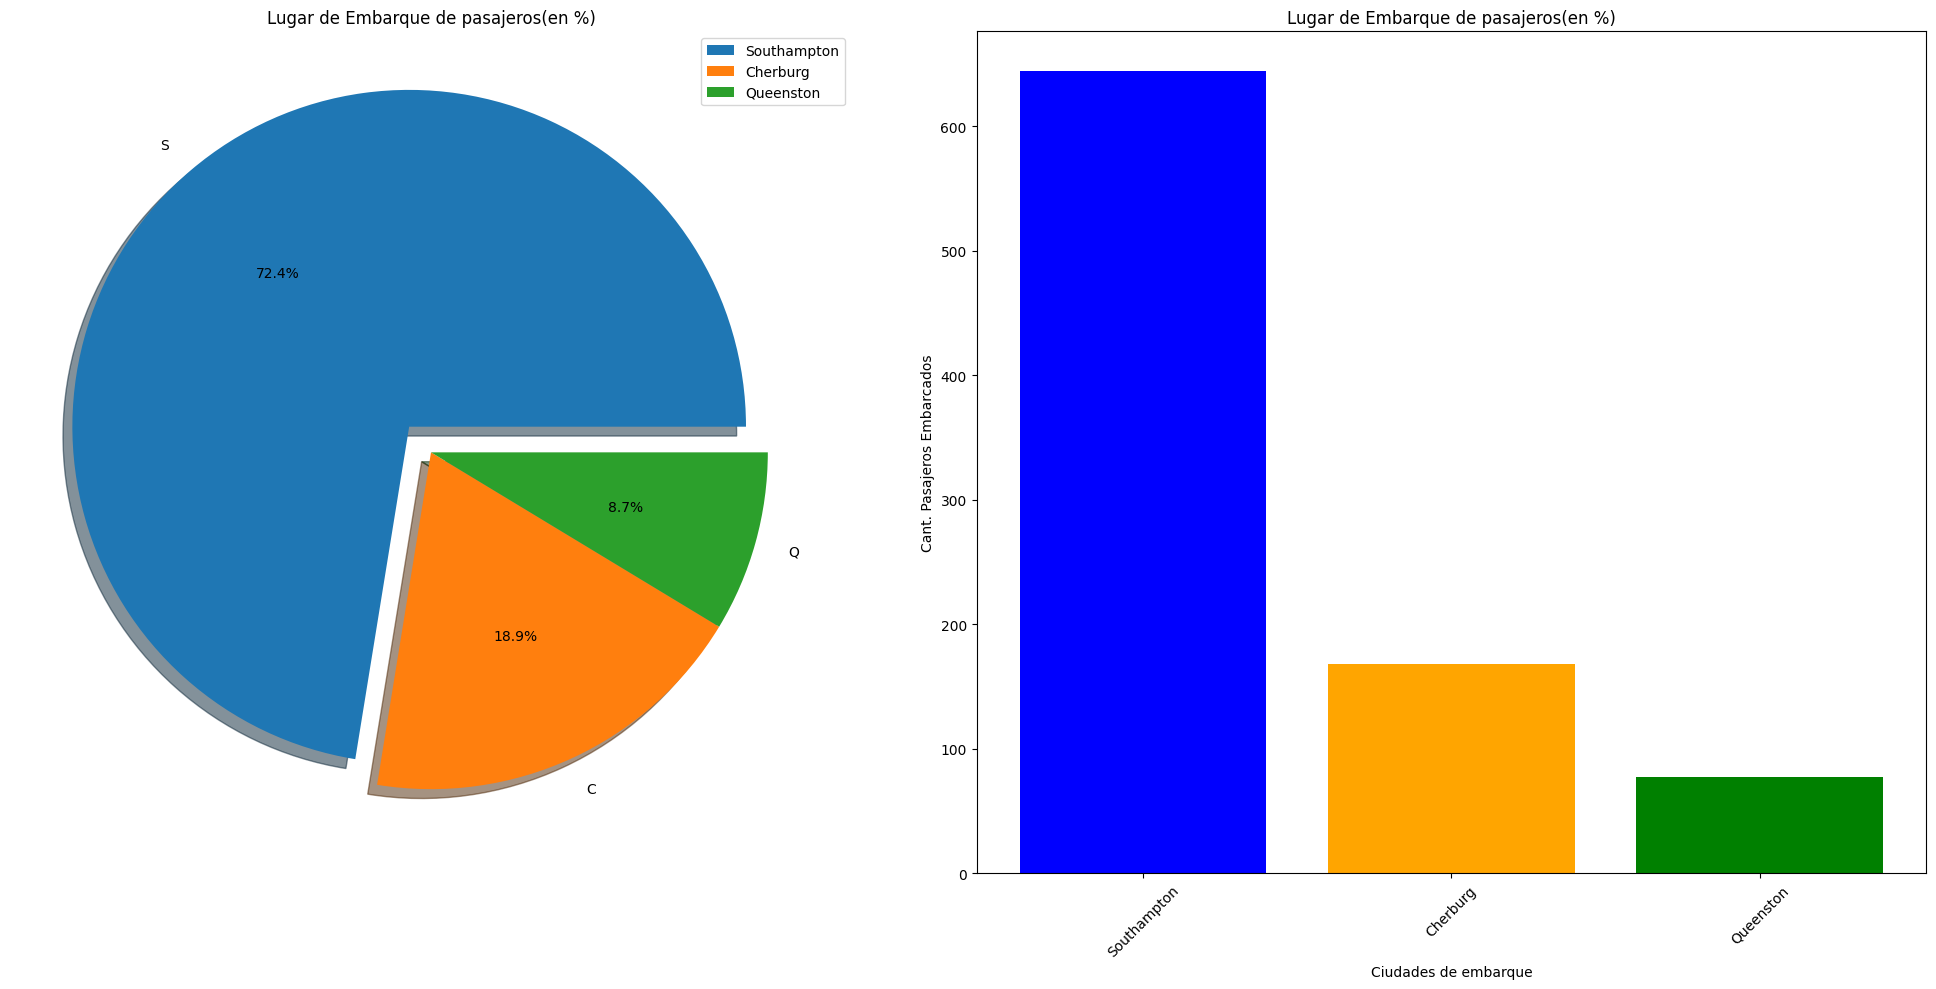

In [22]:
ciudades= ['Southampton', 'Cherburg', 'Queenston']
plt.figure(figsize= (20,10))
plt.subplot(1,2,1)
plt.pie(df.Embarked.value_counts(), labels= df.Embarked.value_counts().index, explode= (0.1,0.0,0.0), shadow= True,  autopct='%1.1f%%')
# lugares= df.Embarked.value_counts().plot(kind='pie', figsize=(10,10), explode= (0.0,0.0,0.0), autopct='%1.1f%%', )
plt.title('Lugar de Embarque de pasajeros(en %)')
plt.legend(ciudades)

plt.subplot(1,2,2)

plt.bar(df.Embarked.value_counts().index, df.Embarked.value_counts(), tick_label= ciudades, color= ['blue','orange','green'])
plt.title('Lugar de Embarque de pasajeros(en %)')
plt.xlabel('Ciudades de embarque')
plt.ylabel('Cant. Pasajeros Embarcados')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [23]:
#  gran parte de los pasajeros registrados como embarcados, abordaron el titanic en southampton, que fue el lugar de salida del titanic.

In [24]:
df[df.Embarked.isnull()]  ## registros donde el campo Embarked contiene valores nulos

,Survived,Class,Name,Sex,Age,Kinfolk,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,113572,80.0,B28,NaN


In [25]:
## estos valores dan para un analisis mas profundo, ya que no sabemos en cual de todas las paradas que realizo el titanic en su trayecto subieron estos pasajeros.
## ademas de su edad, y el costo de su ticket, podemos establecer de que se trata de una señora adinerada con su acompañante/sirviente, la cuestion principal es porque no se registro 
## su lugar de abordaje, ya que sobrevivieron.

 ### 'SURVIVED'

In [26]:
# Cabe destacar que gran parte de las personas que estaban en el titanic pertenecian a la tripulacion, y/o a pasajeros a los cuales no se realizo el registro de abordaje.
# La data nos señala que hubo un total de aproximadamente 2223 personas que iban a bordo del titanic, de las cuales 1514 fallecieron.

total_personas= 2223
fallecidos= 1514

In [27]:
df.index ## corroboramos que no haya vacios en la progresion de los ID de los registros

## por lo tanto vemos que existe una discrepancia entre los pasajeros registrados y la cantidad de persoans a bordo del titanic
total_registros= 891 ## el ID va de 0 a 890(el rango va de 0 a 891 pero el ultimo valor queda fuera de la secuencia)

diferencia= total_personas - total_registros
diferencia

1332

In [28]:
porcentaje_fallecidos= fallecidos/total_personas

print(f'Alrededor del {round((porcentaje_fallecidos*100), 2)}% de las personas a bordo del titanic fallecieron en el naufragio')



Alrededor del 68.11% de las personas a bordo del titanic fallecieron en el naufragio


In [29]:
pasajeros_registrados= df.index.max()+1
sobrevivientes= df.Survived[df.Survived == 1].count() ## contamos la cantidad de pasajeros registrados que sobrevivieron
fallecidos= (pasajeros_registrados) - sobrevivientes

porcentaje_fallecidos= fallecidos / pasajeros_registrados

print(f'Alrededor del {round((porcentaje_fallecidos*100), 2)}% de los pasajeros registrados fallecieron en el naufragio')
print(f'Alrededor del {round(((fallecidos/1514)*100), 2)}% de los fallecidos, eran pasajeros registrados')
print(f'Alrededor del {round((fallecidos/total_personas)*100, 2)}% de las personas que estaban a bordo, son pasajeros fallecidos')

Alrededor del 61.62% de los pasajeros registrados fallecieron en el naufragio
Alrededor del 36.26% de los fallecidos, eran pasajeros registrados
Alrededor del 24.7% de las personas que estaban a bordo, son pasajeros fallecidos


In [30]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

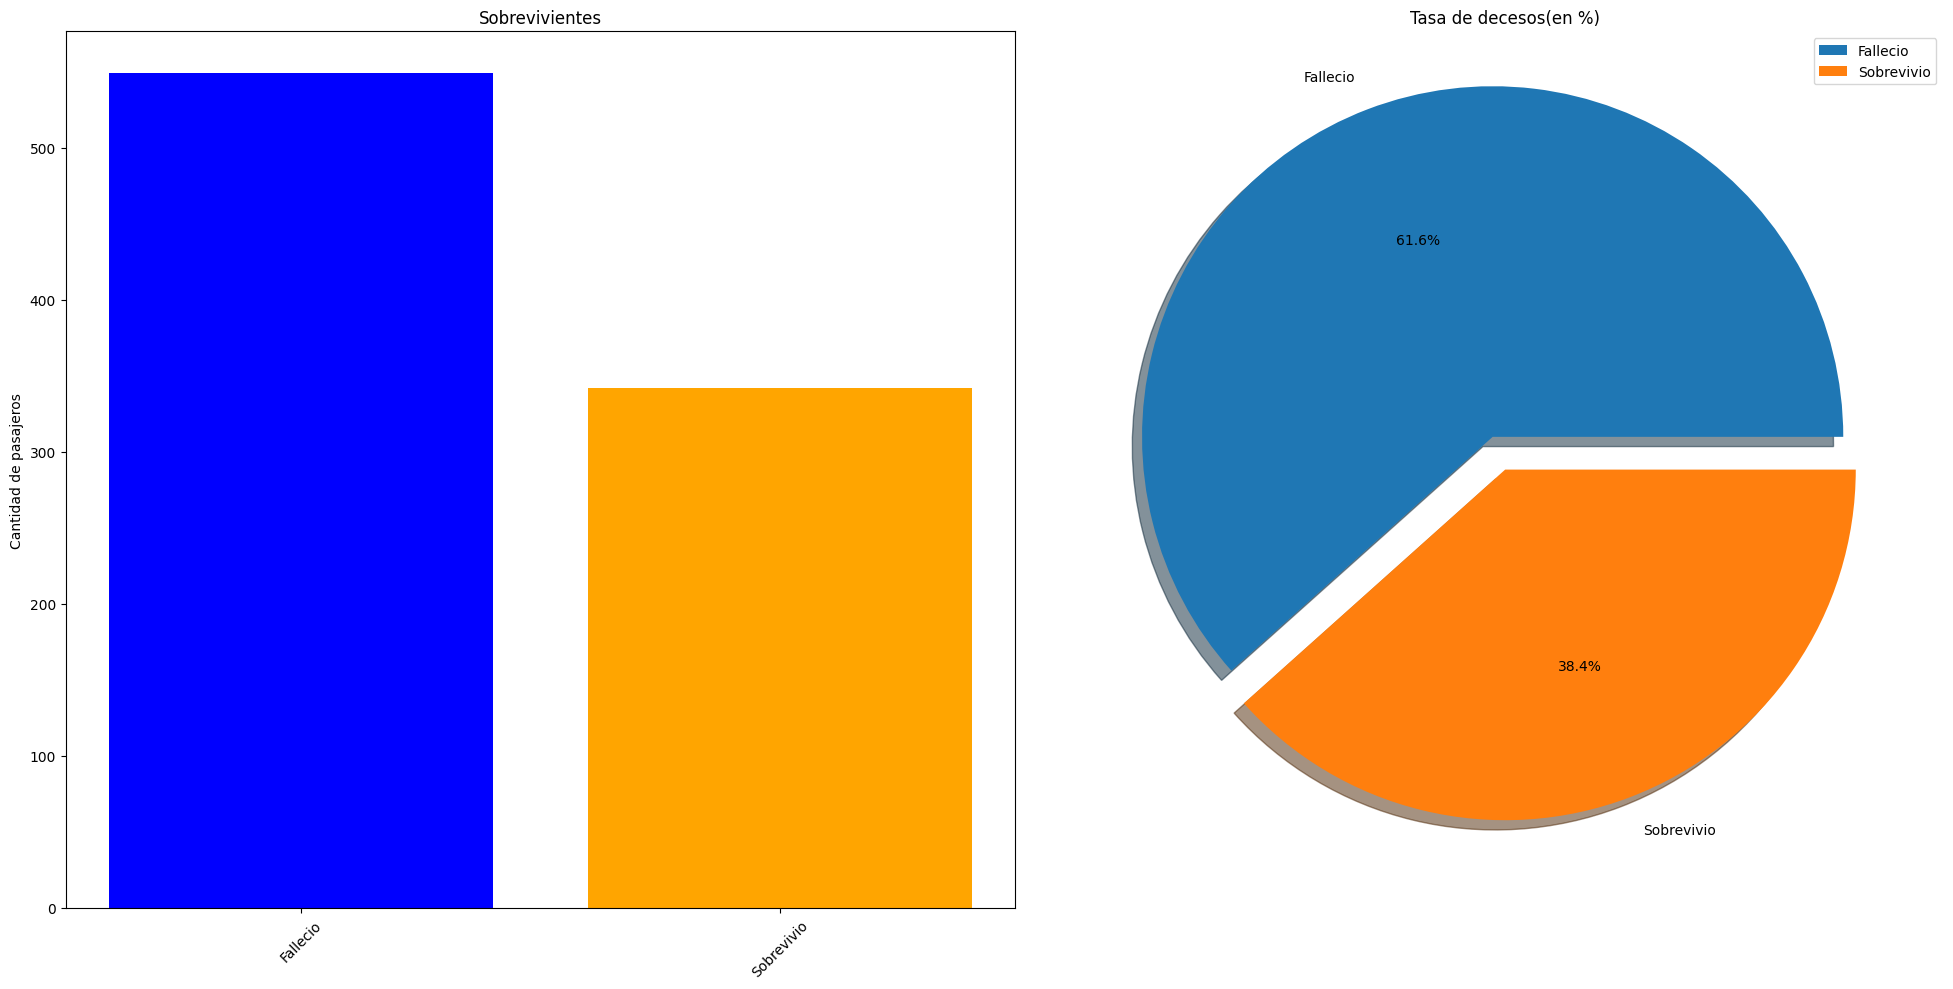

In [31]:
etiquetas= ['Fallecio','Sobrevivio']
plt.figure(figsize= (20,10))
plt.subplot(1,2,1)

plt.bar(etiquetas, df.Survived.value_counts(), tick_label= etiquetas, color= ['blue','orange','green'])
plt.title('Sobrevivientes')
plt.ylabel('Cantidad de pasajeros')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
plt.pie(df.Survived.value_counts(), explode= (0.1,0.0), labels= etiquetas, shadow= True,  autopct='%1.1f%%')
plt.title('Tasa de decesos(en %)')
plt.legend(etiquetas)


plt.tight_layout()
plt.show()

 ### 'FARE'

In [32]:
# df[df.Fare == 0.0] ### pasajeros a los que no se les ha cobrado costo de pasaje.
# df.Fare.sort_values(ascending= True).head(20)

## excluimos los valores 0.0
muestra= df.Fare[df.Fare != 0.0]

print(f'Precio maximo: {muestra.max()}')
print(f'Precio minimo: {muestra.min()}')
print(f'Promedio en el precio del pasaje: {muestra.mean()}')
print(f'Mediana de la muestra: {muestra.median()}')

Precio maximo: 512.3292
Precio minimo: 4.0125
Promedio en el precio del pasaje: 32.75564988584475
Mediana de la muestra: 14.5


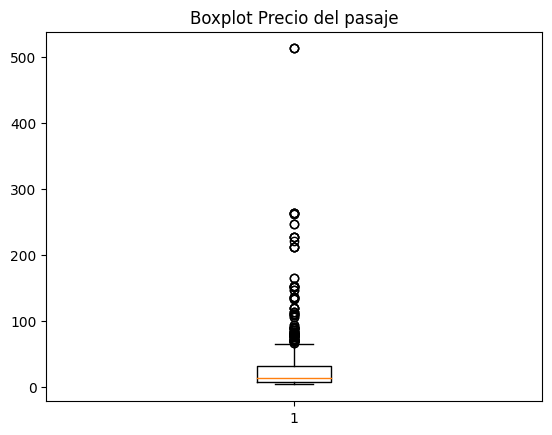

In [33]:
plt.boxplot(muestra)
plt.title('Boxplot Precio del pasaje')
plt.show()

In [34]:
## existen varios outliers, que sesgan la media.
## en general, se ve ene el grafico de caja, que los valores outliers se enceuntran en su mayoria, en un valor superior a 100 aprox.

In [35]:
muestra.describe() ## estadisticos del precio del pasaje sin tomar en cuenta los boletos gratis.

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [36]:
## podemos ver que el 75 porciento de la muestra se encuentra dentro del rango de 31 de precio, mientras que el valor de la media que conseguimos es de 32,75, lo que nos da cuenta de que la muestra se encuentra muy sesgada

Q1= muestra.quantile(0.25)
Q3= muestra.quantile(0.75)
mediana= muestra.median()
IQR= Q3-Q1

print(f'Rango intercuartilico: {IQR}')

limit_sup= Q3 + 1.5*IQR
limit_inf= Q1 - 1.5*IQR
print(f'Limite superior de la caja: {limit_sup}\n')
# print(limit_inf)

## buscamos los valores atipicos
superior= muestra >= (Q3 + 1.5*IQR)
inferior=  muestra <= (Q1 - 1.5*IQR)

print(f'Indices donde el valor del precio del boleto, excede el valor del limite superior de la caja:\n {np.where(superior)}')
# print(np.where(inferior))

## a fines estadisticos, calculamos tambien el limite inferior de la muestra, pero en la practica este calculo es incongruente, ya que no puede haber un precio negativo para un pasaje.


Rango intercuartilico: 23.349999999999998
Limite superior de la caja: 66.3

Indices donde el valor del precio del boleto, excede el valor del limite superior de la caja:
 (array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 179, 194, 200, 214, 217, 223, 229, 244, 255, 256,
       257, 261, 266, 267, 272, 286, 287, 293, 295, 300, 301, 302, 305,
       306, 313, 314, 319, 320, 327, 329, 331, 332, 336, 361, 364, 368,
       370, 372, 375, 380, 385, 388, 407, 429, 432, 439, 447, 476, 478,
       488, 490, 496, 497, 512, 519, 529, 532, 536, 542, 549, 550, 573,
       577, 579, 583, 600, 618, 631, 635, 645, 649, 650, 655, 668, 670,
       678, 687, 689, 697, 705, 719, 725, 729, 730, 733, 747, 751, 753,
       767, 777, 780, 790, 806, 814, 820, 831, 834, 841, 848, 864],
      dtype=int64),)


In [37]:
outliers= muestra.iloc[np.where(superior)].count()## cantidad de registros que tienen precios outliers.
temp= (muestra.count()) - outliers
temp ### registros sin outliers


760

In [38]:
# muestra.iloc[np.where(superior)] ## registros outliers
# muestra[muestra < limit_sup] ## registros sin valores outliers


In [39]:
## creamos los rangos de valor para cada etiqueta
barato= muestra[(muestra >= muestra.min()) & (muestra < muestra.median())].count()
medio= muestra[(muestra >= muestra.median()) & (muestra <= limit_sup)].count()
caro= muestra[muestra > limit_sup].count()
# recuento= [len(barato), len(medio), len(caro)] ## realizamos un recuento de frecuencias que corresponden a cada etiqueta
recuento= [barato, medio, caro]


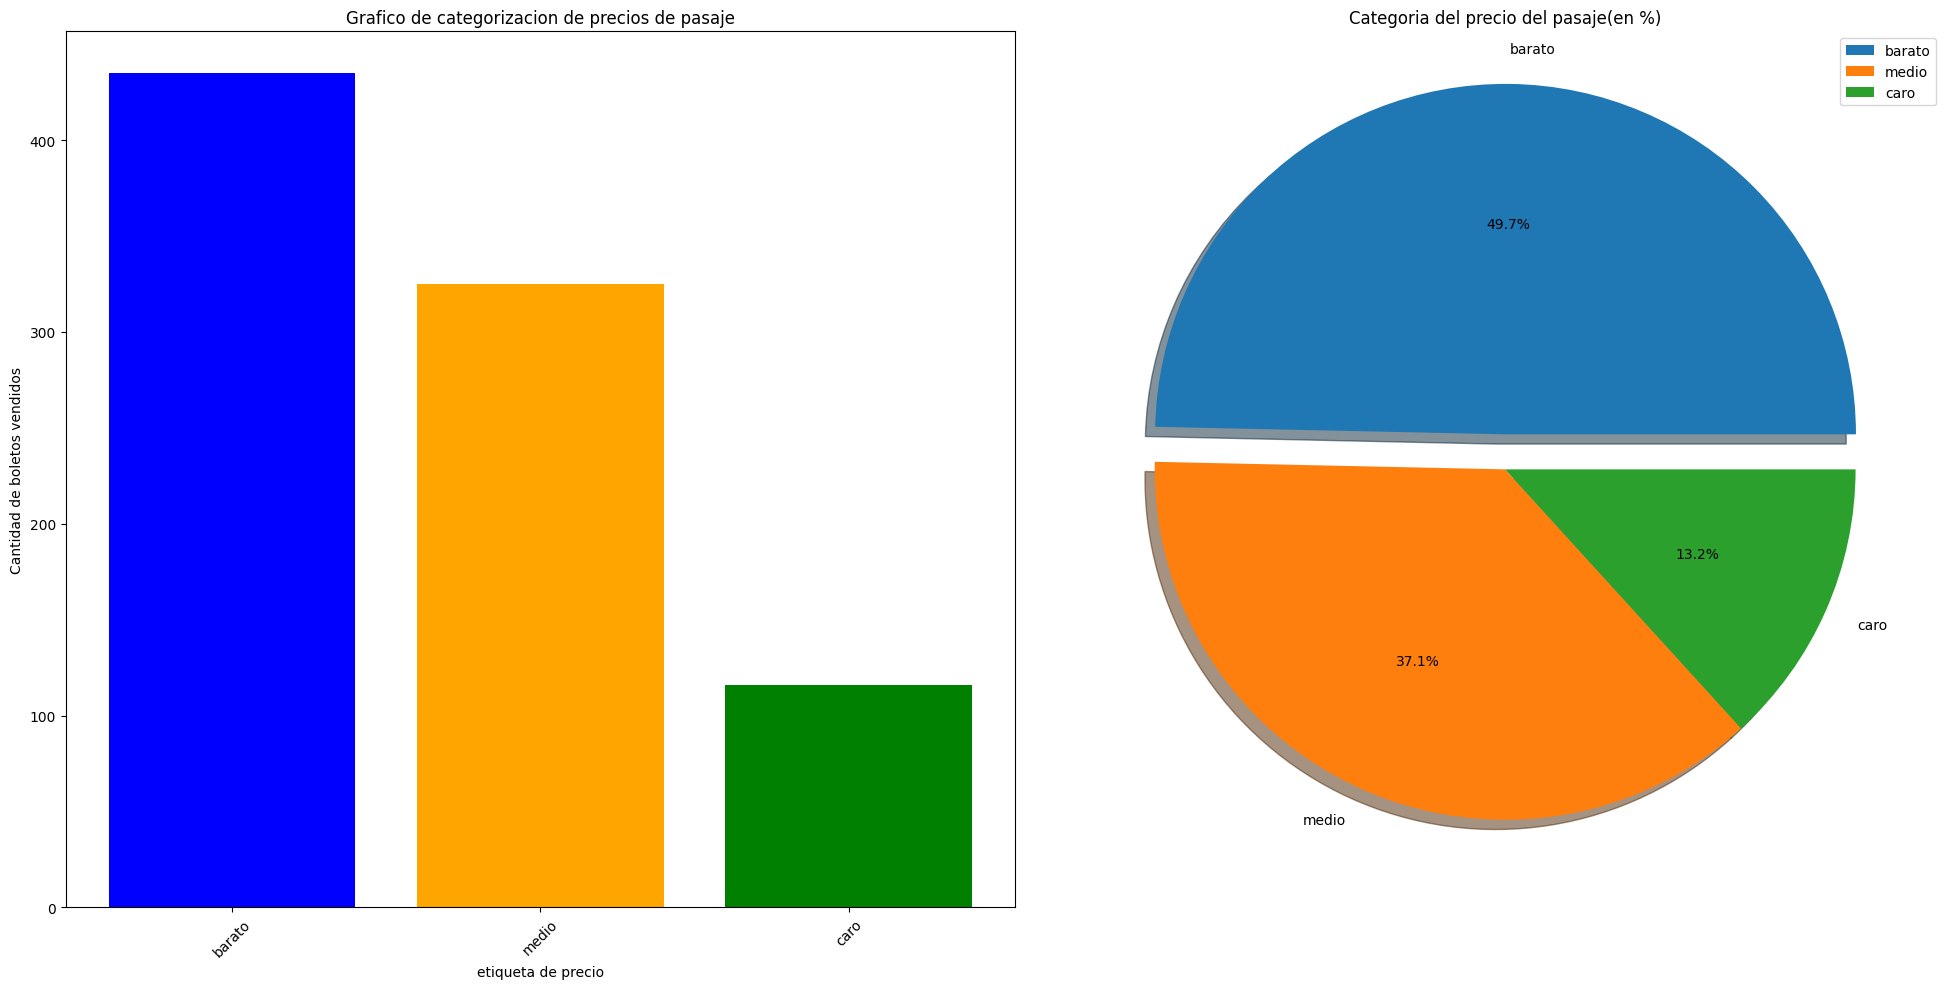

In [40]:
# creamos las etiquetas para categorizar la variable fare (precio del pasaje)
etiquetas= ['barato', 'medio', 'caro']

plt.figure(figsize= (20,10))
plt.subplot(1,2,1)

plt.bar(etiquetas, recuento, tick_label= etiquetas, color= ['blue','orange','green'])
plt.title('Grafico de categorizacion de precios de pasaje')
plt.xlabel('etiqueta de precio')
plt.ylabel('Cantidad de boletos vendidos')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
plt.pie(recuento, explode= (0.1,0.0,0.0), labels= etiquetas, shadow= True,  autopct='%1.1f%%')
plt.title('Categoria del precio del pasaje(en %)')
plt.legend(etiquetas)


plt.tight_layout()
plt.show()

 ### 'AGE'

In [41]:
print(f'Edad maxima de pasajero/s: {df.Age.max()}')
print(f'Edad minima de pasajero/s: {df.Age.min()}')

Edad maxima de pasajero/s: 80
Edad minima de pasajero/s: 0


In [42]:
# nos cercioramos que no haya valores del campo Age en 0 en la version anterior a reemplazar los valores nan por ceros

temp= pd.DataFrame(archivo)
print(temp.Age[temp.Age == 0.0].count()) ## los registros donde el pasajero tiene 0 años de edad
print(temp.Age[temp.Age == 1.0].count()) ## los registros donde el pasajero tiene 1 año de edad

## por lo visto, no hay registros con pasajeros de 0 años de edad, antes del reemplazo de valores.

0
7


In [43]:
muestra= df.Age[df.Age != 0] ##tomamos el campo Age excluyendo los valores 0

In [44]:
muestra.describe()

count    707.000000
mean      29.973126
std       14.303296
min        1.000000
25%       21.000000
50%       28.000000
75%       38.500000
max       80.000000
Name: Age, dtype: float64

In [45]:
##estos estadisticos nos muestran que en general, los pasajeros del titanic eran en su mayoria jovenes o jovenes adultos, 

In [46]:
Q1= muestra.quantile(0.25)
Q3= muestra.quantile(0.75)
mediana= muestra.median()
IQR= Q3-Q1
print(f'Rango intercuartilico: {IQR}')

limit_sup= Q3 + 1.5*IQR
limit_inf= Q1 - 1.5*IQR
print(f'Limite superior de la caja: {limit_sup}')
print(f'Limite inferior de la caja: {limit_inf}\n')

## buscamos los valores atipicos
superior= muestra >= (limit_sup)
inferior=  muestra <= (limit_inf)


print(f'Indices donde el valor del precio del boleto, excede el valor del limite superior de la caja:\n {np.where(superior)}')

### fijarse porque la linea de codigo anterior me devuelve indices incorrectos, y cuando la uso como grupo de indices
# para la asignacion de registros para dar output en referencia a 'muestra', devuelve el grupo de indices correctos, con los valores correspondientes

Rango intercuartilico: 17.5
Limite superior de la caja: 64.75
Limite inferior de la caja: -5.25

Indices donde el valor del precio del boleto, excede el valor del limite superior de la caja:
 (array([ 25,  40,  73,  90, 224, 364, 390, 495, 527, 588, 672], dtype=int64),)


In [47]:
# muestra[superior]
# muestra.iloc[np.where(superior)]
# muestra.iloc[np.where(superior)].value_counts()

In [48]:
print(f'Coeficiente de variacion (sin los nan/valores 0): {muestra.std()/ muestra.mean()}')## coeficiente de variacion de la muestra(sin los valores 0)
# print(f'Coeficiente de variacion del dataframe: {df.Age.std()/df.Age.mean()}')## coeficiente de variacion del campo Age del dataframe(contiene los valores 0)

## podemos notar que la variabilidad o dispersion de los datos no es tan pronunciada, incluso si tomamos en cuenta los valores outliers


Coeficiente de variacion (sin los nan/valores 0): 0.4772039983593671


In [49]:
import seaborn as sns
sns.set()

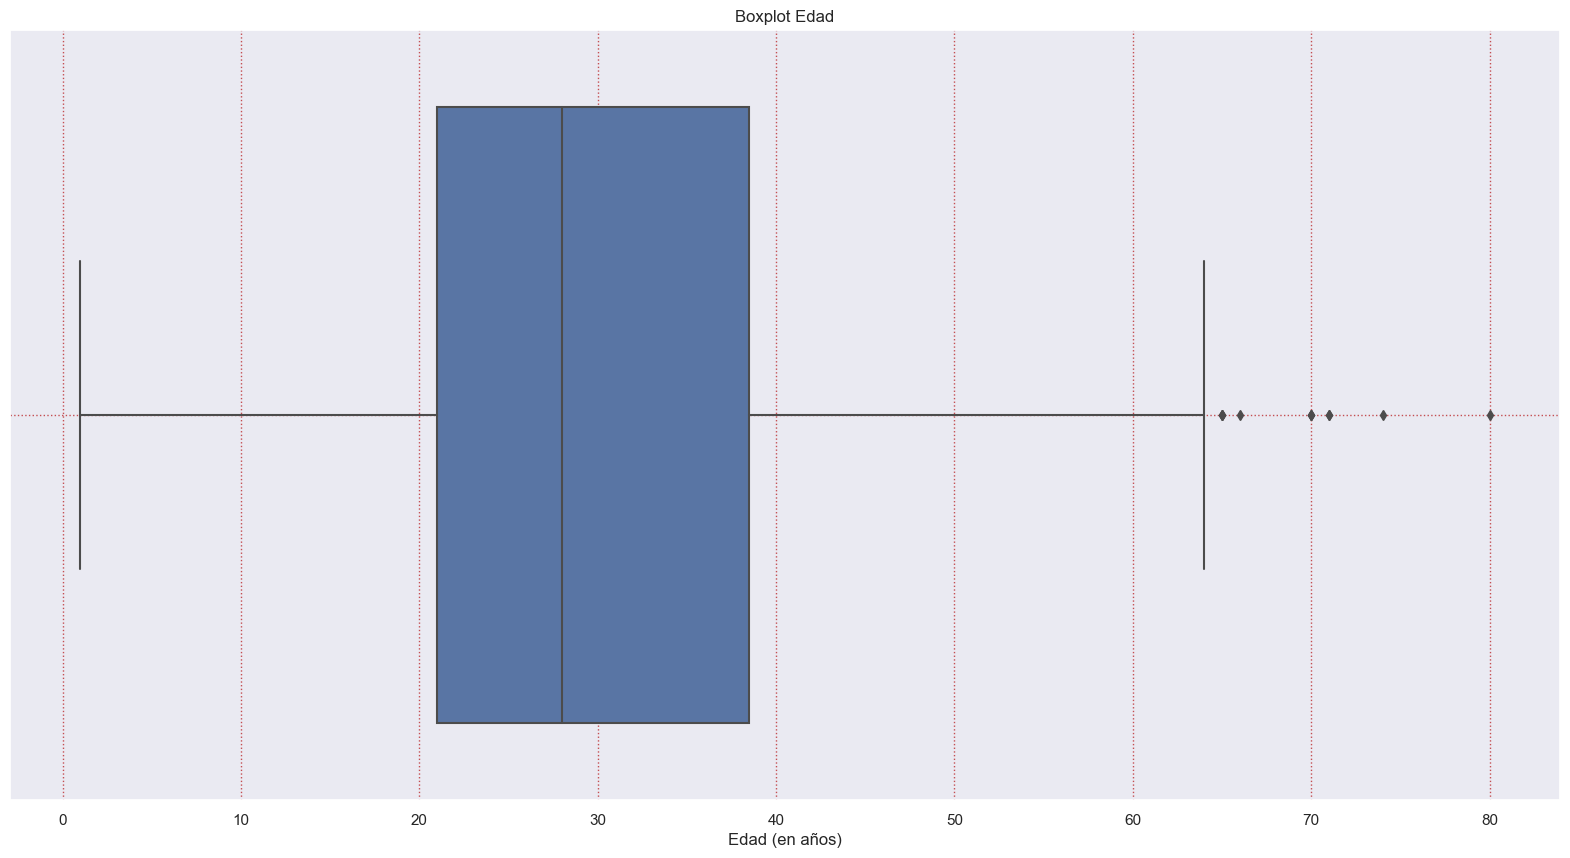

In [50]:
plt.figure(figsize= (20,10))
sns.boxplot(data= muestra, x= muestra)
plt.xlabel('Edad (en años)')
plt.title("Boxplot Edad")

plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

 ### 'CLASS'

In [51]:

clases= df.Class.value_counts().sort_index()


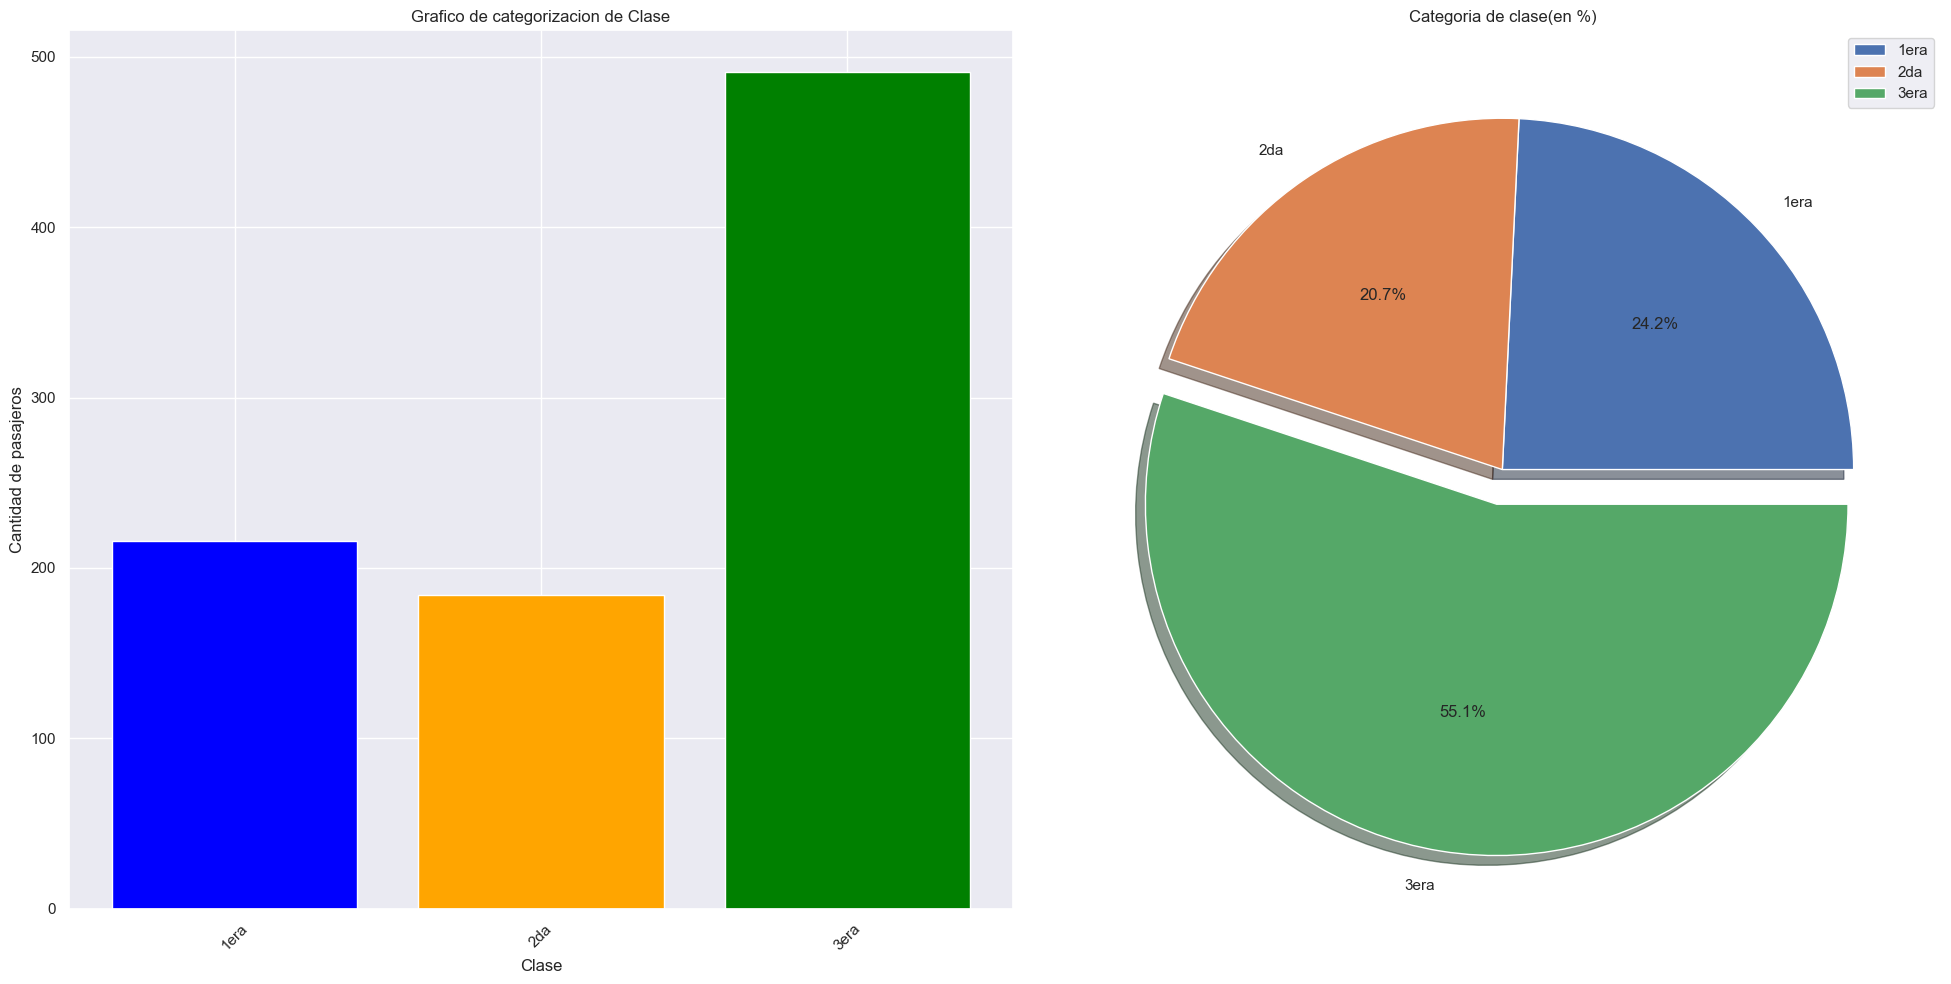

In [52]:
etiquetas= ['1era', '2da', '3era']

plt.figure(figsize= (20,10))
plt.subplot(1,2,1)

plt.bar(etiquetas, clases, tick_label= etiquetas, color= ['blue','orange','green'])
plt.title('Grafico de categorizacion de Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de pasajeros')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
plt.pie(clases, explode= (0.0,0.0,0.1), labels= etiquetas, shadow= True,  autopct='%1.1f%%')
plt.title('Categoria de clase(en %)')
plt.legend(etiquetas)


plt.tight_layout()
plt.show()

### 'CABIN'

In [53]:
cabinas= df.Cabin.value_counts() 
lista_temp= []  ### lista de las cabinas para pasajeros en el titanic
for row in cabinas.index:
    row= row.split(' ')
    for x in row:
        lista_temp.append(x)
print(f'Cabinas: {len(lista_temp)}')
# 'NaN' in lista_temp### ya que el metodo value_counts excluye por defecto los valores NaN

Cabinas: 163


In [54]:
sin_cabina= df[df.Cabin.isnull() == True] ## personas sin cabina
con_cabina= df[df.Cabin.isnull() == False] ## personas con cabina
con_cabina[con_cabina.Cabin == 'B51 B53 B55']### ???? que podria significar esto? hay desproporcion ilogica en varios valores en ambos registros(el hecho de pagar 3 cabinas diferentes en 1era
# clase, el hecho de ser 2 personas diferentes en total registradas para esas cabinas, y en referencia a ellos, solo 1 registro que tiene un pariente, mientras que el otro no,
# el valor de sus boletos(claramente uno pago por todos o por la mayoria)

,Survived,Class,Name,Sex,Age,Kinfolk,Ticket,Fare,Cabin,Embarked
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,1,PC 17755,512.3292,B51 B53 B55,C
872,0,1,"Carlsson, Mr. Frans Olof",male,33,0,695,5.0000,B51 B53 B55,S


In [55]:
### investigamos un poco este branch de informacion especifica
for row in df.Name:
    if 'Carlsson' in row:
        print(row)
    else:
        continue
for row in df.Name:
    if 'Cardeza' in row:
        print(row)
    else:
        continue

Carlsson, Mr. August Sigfrid
Carlsson, Mr. Frans Olof
Cardeza, Mr. Thomas Drake Martinez


In [56]:
df[df.Name == 'Carlsson, Mr. August Sigfrid']

,Survived,Class,Name,Sex,Age,Kinfolk,Ticket,Fare,Cabin,Embarked
756,0,3,"Carlsson, Mr. August Sigfrid",male,28,0,350042,7.7958,NaN,S


In [57]:
temp= df[(df.Ticket == 'PC 17755')].append(df.loc[[872,756]])
# temp.append(df.loc[695])## agreagamos el registro que faltaba
temp

C:\Users\usuario\AppData\Local\Temp\ipykernel_7656\71318373.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp= df[(df.Ticket == 'PC 17755')].append(df.loc[[872,756]])


,Survived,Class,Name,Sex,Age,Kinfolk,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35,0,PC 17755,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35,0,PC 17755,512.3292,B101,C
872,0,1,"Carlsson, Mr. Frans Olof",male,33,0,695,5.0000,B51 B53 B55,S
756,0,3,"Carlsson, Mr. August Sigfrid",male,28,0,350042,7.7958,NaN,S


In [58]:
### por un analisis apoyado en nuestras observaciones, podemos concluir que los registros extraidos, conllevan la siguiente relacion posible:
## los pasajeros que subieron a bordo del titanic en Cherbourg, por el hecho de que tienen el mismo boleto, y que pagaron un precio de pasaje exorbitante en realacion al resto de 
## los de mas pasajeros, y tambien porque alquilaron 3 cabinas juntas en 1era clase, la conclusion mas plausible es que el señor Cardeza, sea un señor adinerado, al cual lo acom_
## pañaron la señorita Anna(muy probablemente una sirvienta o menos probablemente su pareja) y el señor Lesurer, al cual es dificil emparentarlo mas que como empleado o socio.
### por otra parte, es posible que le señor Frans Carlsson sea a su vez un empleado mas del señor Cardeza, el cual reservo y organizo el hospedaje a bordo del titanic antes de que su
## empleador lo abordara.
## con respecto al señor August Carlsson, me es dificil encontrarle una relacion mas alla del apellido, lo mas probable es que esto ultimo haya sido una coincidencia.

In [59]:
##para corroborar estas conjeturas, realizaremos una investigacion por la web.

# Thomas Cardeza subió el 10 de abril de 1912 en Cherburgo, Francia, como pasajero de primera clase a bordo del Titanic y ocupó una de las dos suites de lujo 
# (Suite B51 / 53/55 ​) con una cubierta de paseo privada en el lado de estribor de la cubierta B del transatlántico de lujo. Lo acompañaba su madre, su doncella Annie Ward 
#  y su propio valet o sirviente personal Gustave Lesueur.

# Carlsson, Mr. Frans Olof Su ocupación se destacó como "compañero de velero " y se decía que había llegado a los Estados Unidos en 1902.
# En abril de 1912 se uniría al  St Louis de American Line , pero debido a la huelga del carbón el barco quedó varado en Southampton, por 
# lo que la compañía le dio un billete de primera clase de regreso a Nueva York en el Titanic .

In [60]:
df[(df.Embarked == 'C') & (df.Age >= 46) & (df.Sex == 'female')]

## una de ellas es la madre del señor Cardeza, ya que el señor Cardeaza tenia 36 años al momento del naufragio, por ende su madre debe ser mayor en edad(en esa epoca, las mujeres)
## se casaban a corta edad y podian tener familia en sus años de pubertad/adolescencia) en minimo, 10 años, debe ahber abordado el barco con el grupo, y obviamente es de genero femenino.

,Survived,Class,Name,Sex,Age,Kinfolk,Ticket,Fare,Cabin,Embarked
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,PC 17572,76.7292,D33,C
177,0,1,"Isham, Miss. Ann Elizabeth",female,50,0,PC 17595,28.7125,C49,C
195,1,1,"Lurette, Miss. Elise",female,58,0,PC 17569,146.5208,B80,C
299,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,1,PC 17558,247.5208,B58 B60,C
366,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60,1,110813,75.2500,D37,C
496,1,1,"Eustis, Miss. Elizabeth Mussey",female,54,1,36947,78.2667,D20,C
513,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54,1,PC 17603,59.4000,NaN,C
556,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48,1,11755,39.6000,A16,C
591,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52,1,36947,78.2667,D20,C
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,1,11767,83.1583,C50,C


 ### RELACION ENTRE VARIABLES

In [61]:
## fallecidos segun su genero
hombres_fallecidos= df.Sex[(df.Sex == 'male') & (df.Survived == 0)].count()
mujeres_fallecidas= df.Sex[(df.Sex == 'female') & (df.Survived == 0)].count()


hombres_sobrevivientes= df.Sex[(df.Sex == 'male') & (df.Survived == 1)].count()
mujeres_sobrevivientes= df.Sex[(df.Sex == 'female') & (df.Survived == 1)].count()

sex_fallec= [hombres_fallecidos, mujeres_fallecidas]


In [62]:
#fallecidos segun su clase
primera_fallecidos= df.Class[(df.Class == 1) & (df.Survived == 0)].count()
segunda_fallecidos= df.Class[(df.Class == 2) & (df.Survived == 0)].count()
tercera_fallecidos= df.Class[(df.Class == 3) & (df.Survived == 0)].count()

primera_sobrevivientes= df.Class[(df.Class == 1) & (df.Survived == 1)].count()
segunda_sobrevivientes= df.Class[(df.Class == 2) & (df.Survived == 1)].count()
tercera_sobrevivientes= df.Class[(df.Class == 3) & (df.Survived == 1)].count()


clase_fallec= [primera_fallecidos, segunda_fallecidos, tercera_fallecidos]


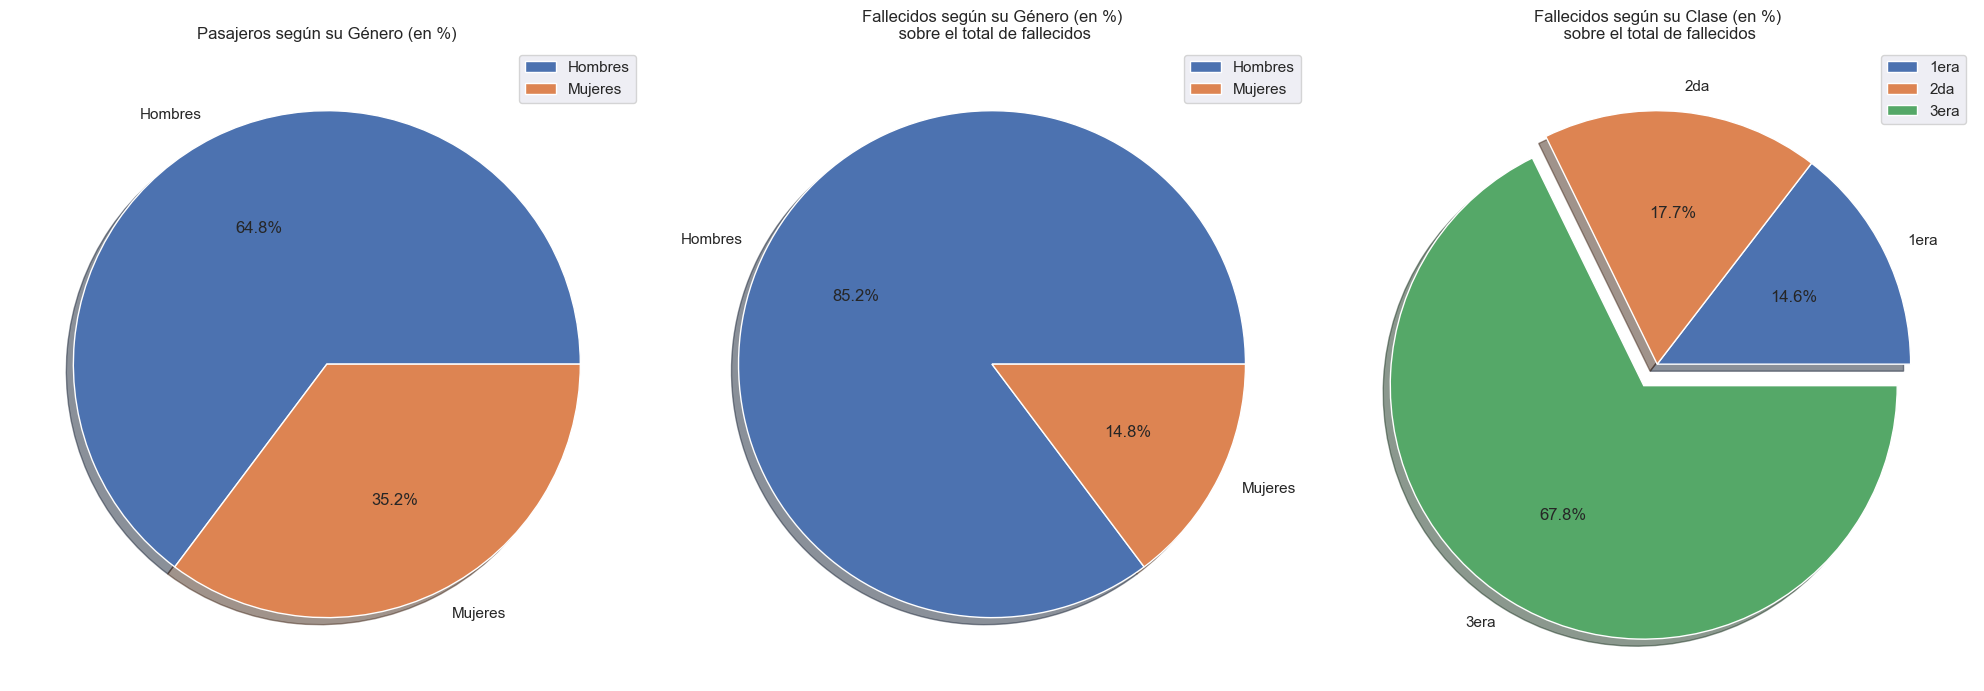

In [63]:
generos= ['Hombres', 'Mujeres']
clase= ['1era', '2da', '3era']

plt.figure(figsize= (20,10))

plt.subplot(1,3,1)
plt.pie(df.Sex.value_counts(), explode= (0.0,0.0), labels= generos, shadow= True,  autopct='%1.1f%%')
plt.title('Pasajeros según su Género (en %)')
plt.legend(generos)

plt.subplot(1,3,2)
plt.pie(sex_fallec, explode= (0.0,0.0), labels= generos, shadow= True,  autopct='%1.1f%%')
plt.title('Fallecidos según su Género (en %)\n sobre el total de fallecidos')
plt.legend(generos)

plt.subplot(1,3,3)
plt.pie(clase_fallec, explode= (0.0,0.0,0.1), labels= clase, shadow= True,  autopct='%1.1f%%')
plt.title('Fallecidos según su Clase (en %)\n sobre el total de fallecidos')
plt.legend(clase)


plt.tight_layout()
plt.show()



In [64]:
# establecemos una categorizacion socio-economica en base a la union y promedio del valor del pasaje, en conjunto con la clase donde se estaba hospedando el pasajero

In [65]:
# existe un error de asignacion de condiciones para el filtrado de ambas variables de forma conjunta(Age y Survived), por lo que se debe revisar

In [66]:
# establecemos una categorizacion de la edad para poder realizar un analisis conjunto de las variables Age con Survived

muestra= df.Age[df.Age != 0]## sacamos los valores 0 de la muestra

niños= muestra[(muestra >= 1) & (muestra <= 16)]
jovenes_adultos= muestra[(muestra > 16) & (muestra <= 50)]
adultos_ancianos= muestra[muestra > 50]

categorias= [(niños.count()), (jovenes_adultos.count()), (adultos_ancianos.count())]
print(categorias)

[93, 550, 64]


In [67]:
print(f'Numero total de pasajeros fallecidos: {df.Survived[df.Survived == 0].count()}')
print(f'Numero total de pasajeros con su edad registrada: {df.Age[df.Age != 0].count()}')

Numero total de pasajeros fallecidos: 549
Numero total de pasajeros con su edad registrada: 707


In [68]:
# hasta aqui, los numeros coinciden (numero de registros asignados a cada pasajero)
# luego de aqui se registra el error de filtrado....

In [69]:
# niños_fallecidos= df.Age[(niños) & (df.Survived == 0)].count()
# JV_fallecidos= df.Age[(jovenes_adultos) & (df.Survived == 0)].count()
# AA_fallecidos= df.Age[(adultos_ancianos) & (df.Survived == 0)].count()

no_registrados= df.Age[(df.Age == 0) & (df.Survived == 0)].count()
niños_fallecidos= df.Age[(df.Age != 0) & (df.Age[df.Age <= 16]) & (df.Survived == 0)].count()
JV_fallecidos= df.Age[(df.Age[(df.Age > 16) & (df.Age <= 50)]) & (df.Survived == 0)].count()
AA_fallecidos= df.Age[(df.Age[df.Age > 50]) & (df.Survived == 0)].count()

edad_fallecidos= [niños_fallecidos, JV_fallecidos, AA_fallecidos]##no_registrados
total= sum([no_registrados,niños_fallecidos, JV_fallecidos, AA_fallecidos])
total

314

In [70]:
print(f'Diferencia entre total_pasajeros_fallecidos y edad_fallecidos: {df.Survived[df.Survived == 0].count() - total}')
# no deberia haber diferencia, mejor dicho, el resultado de la operacion anterior deberia ser 0, ya que los rangos(etiquetas) de edades deberian ser colectivamente exhaustivos y 
# abarcar todos los resultados(regidtros) en donde el valor de Survived es 0(en donde el pasajero fallecio)

Diferencia entre total_pasajeros_fallecidos y edad_fallecidos: 235


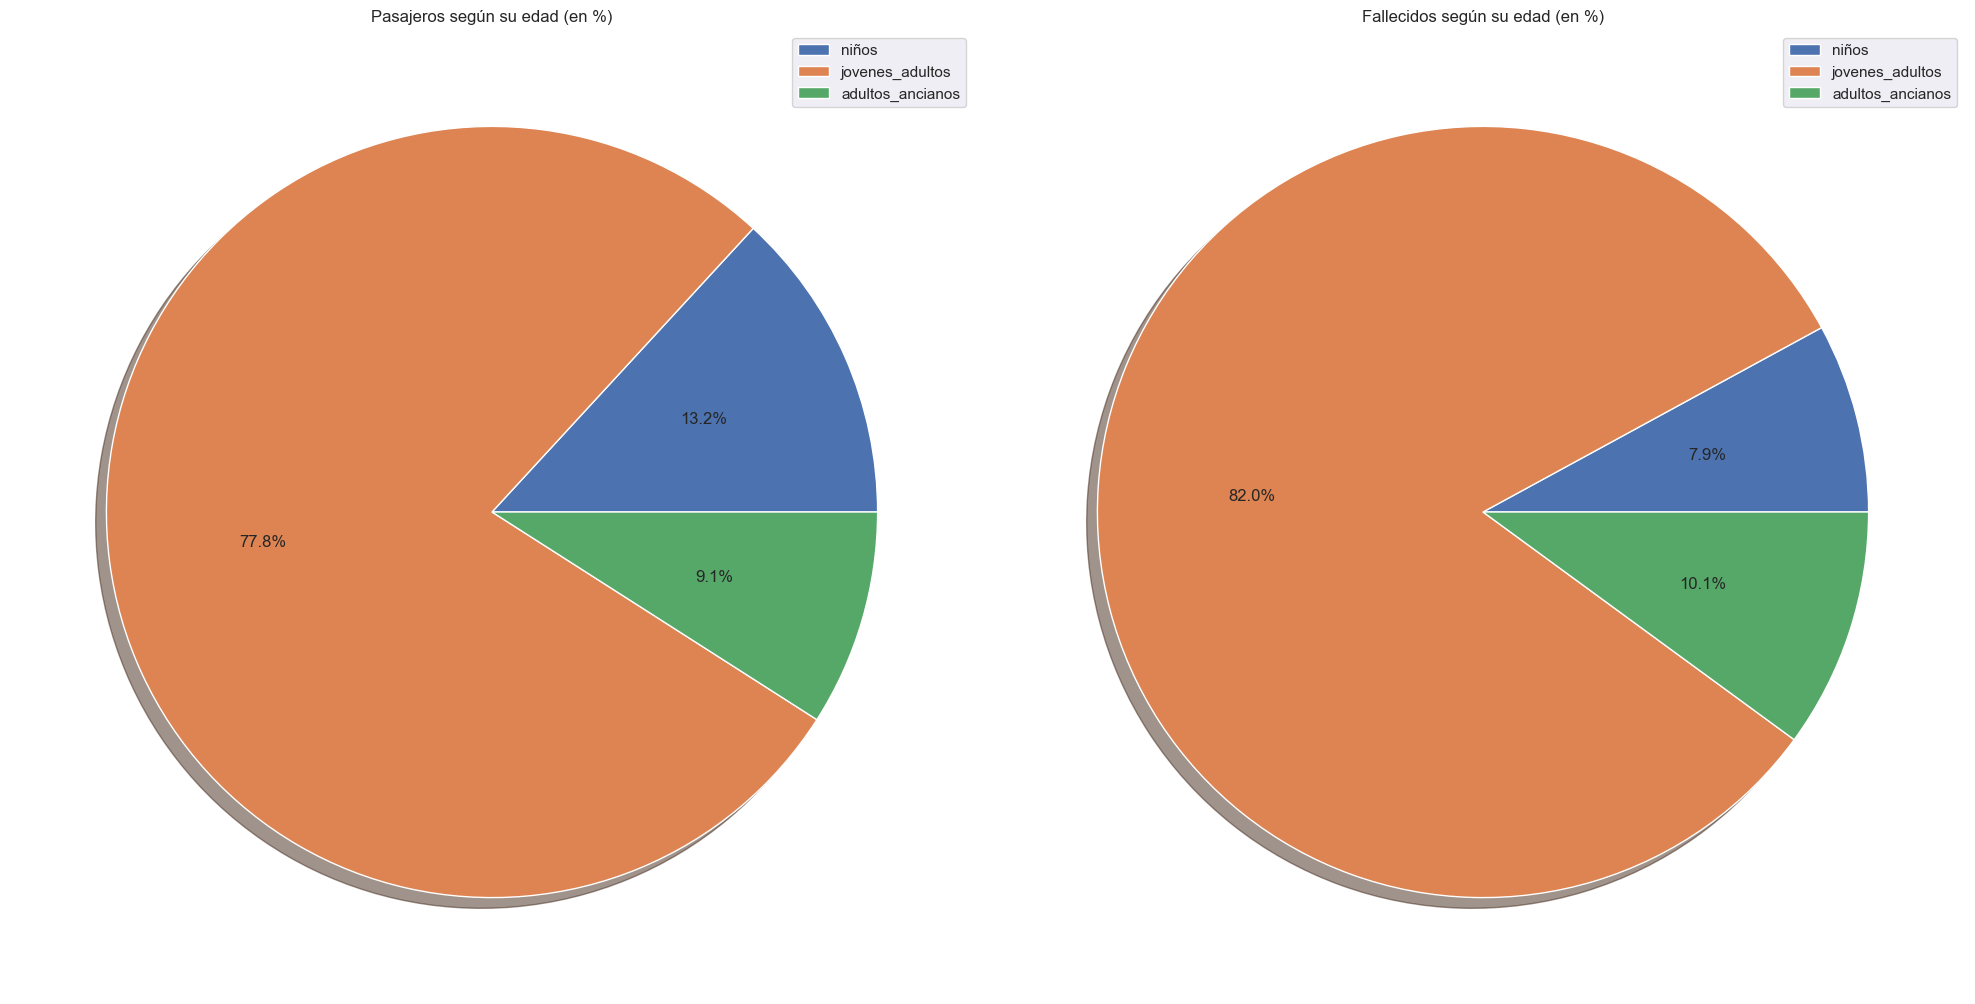

In [71]:
edades= ['niños', 'jovenes_adultos', 'adultos_ancianos']

plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
plt.pie(categorias, explode= (0.0,0.0,0.0),  shadow= True,  autopct='%1.1f%%')
plt.title('Pasajeros según su edad (en %)')
plt.legend(edades)

plt.subplot(1,2,2)
plt.pie(edad_fallecidos, explode= (0.0,0.0,0.0), shadow= True,  autopct='%1.1f%%')
plt.title('Fallecidos según su edad (en %)')
plt.legend(edades)


plt.tight_layout()
plt.show()

# por lo tanto, el segundo grafico no es preciso...


In [72]:
hombres_sobrevivientes= df[(df.Sex == 'male') & (df.Survived == 1)].sort_values('Age', ascending= False)
len(hombres_sobrevivientes[(hombres_sobrevivientes.Age <=15)])

37

In [73]:
df.columns

Index(['Survived', 'Class', 'Name', 'Sex', 'Age', 'Kinfolk', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

# Pruebas de correlaciones y demás

In [74]:
normalizado= df.copy()

In [75]:
# normalizado.drop_duplicates() ###borramos los registros duplicados(en este caso no existen registros duplicados)

In [76]:
normalizado.corr(numeric_only= True)

,Survived,Class,Age,Kinfolk,Fare
Survived,1.000000,-0.338481,0.010508,0.016639,0.257307
Class,-0.338481,1.000000,-0.361566,0.065997,-0.549500
Age,0.010508,-0.361566,1.000000,-0.150673,0.135663
Kinfolk,0.016639,0.065997,-0.150673,1.000000,0.217138
Fare,0.257307,-0.549500,0.135663,0.217138,1.000000


In [154]:
normalizado= normalizado.drop(columns= 'Cabin')## el campo 'Cabin' contiene demasiados valores faltantes, por lo que a efectos practicos, no nos va a ser de utilidad para 
# establecer correlaciones

In [ ]:
## vamos a graficar las correlaciones entre variables

C:\Users\usuario\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


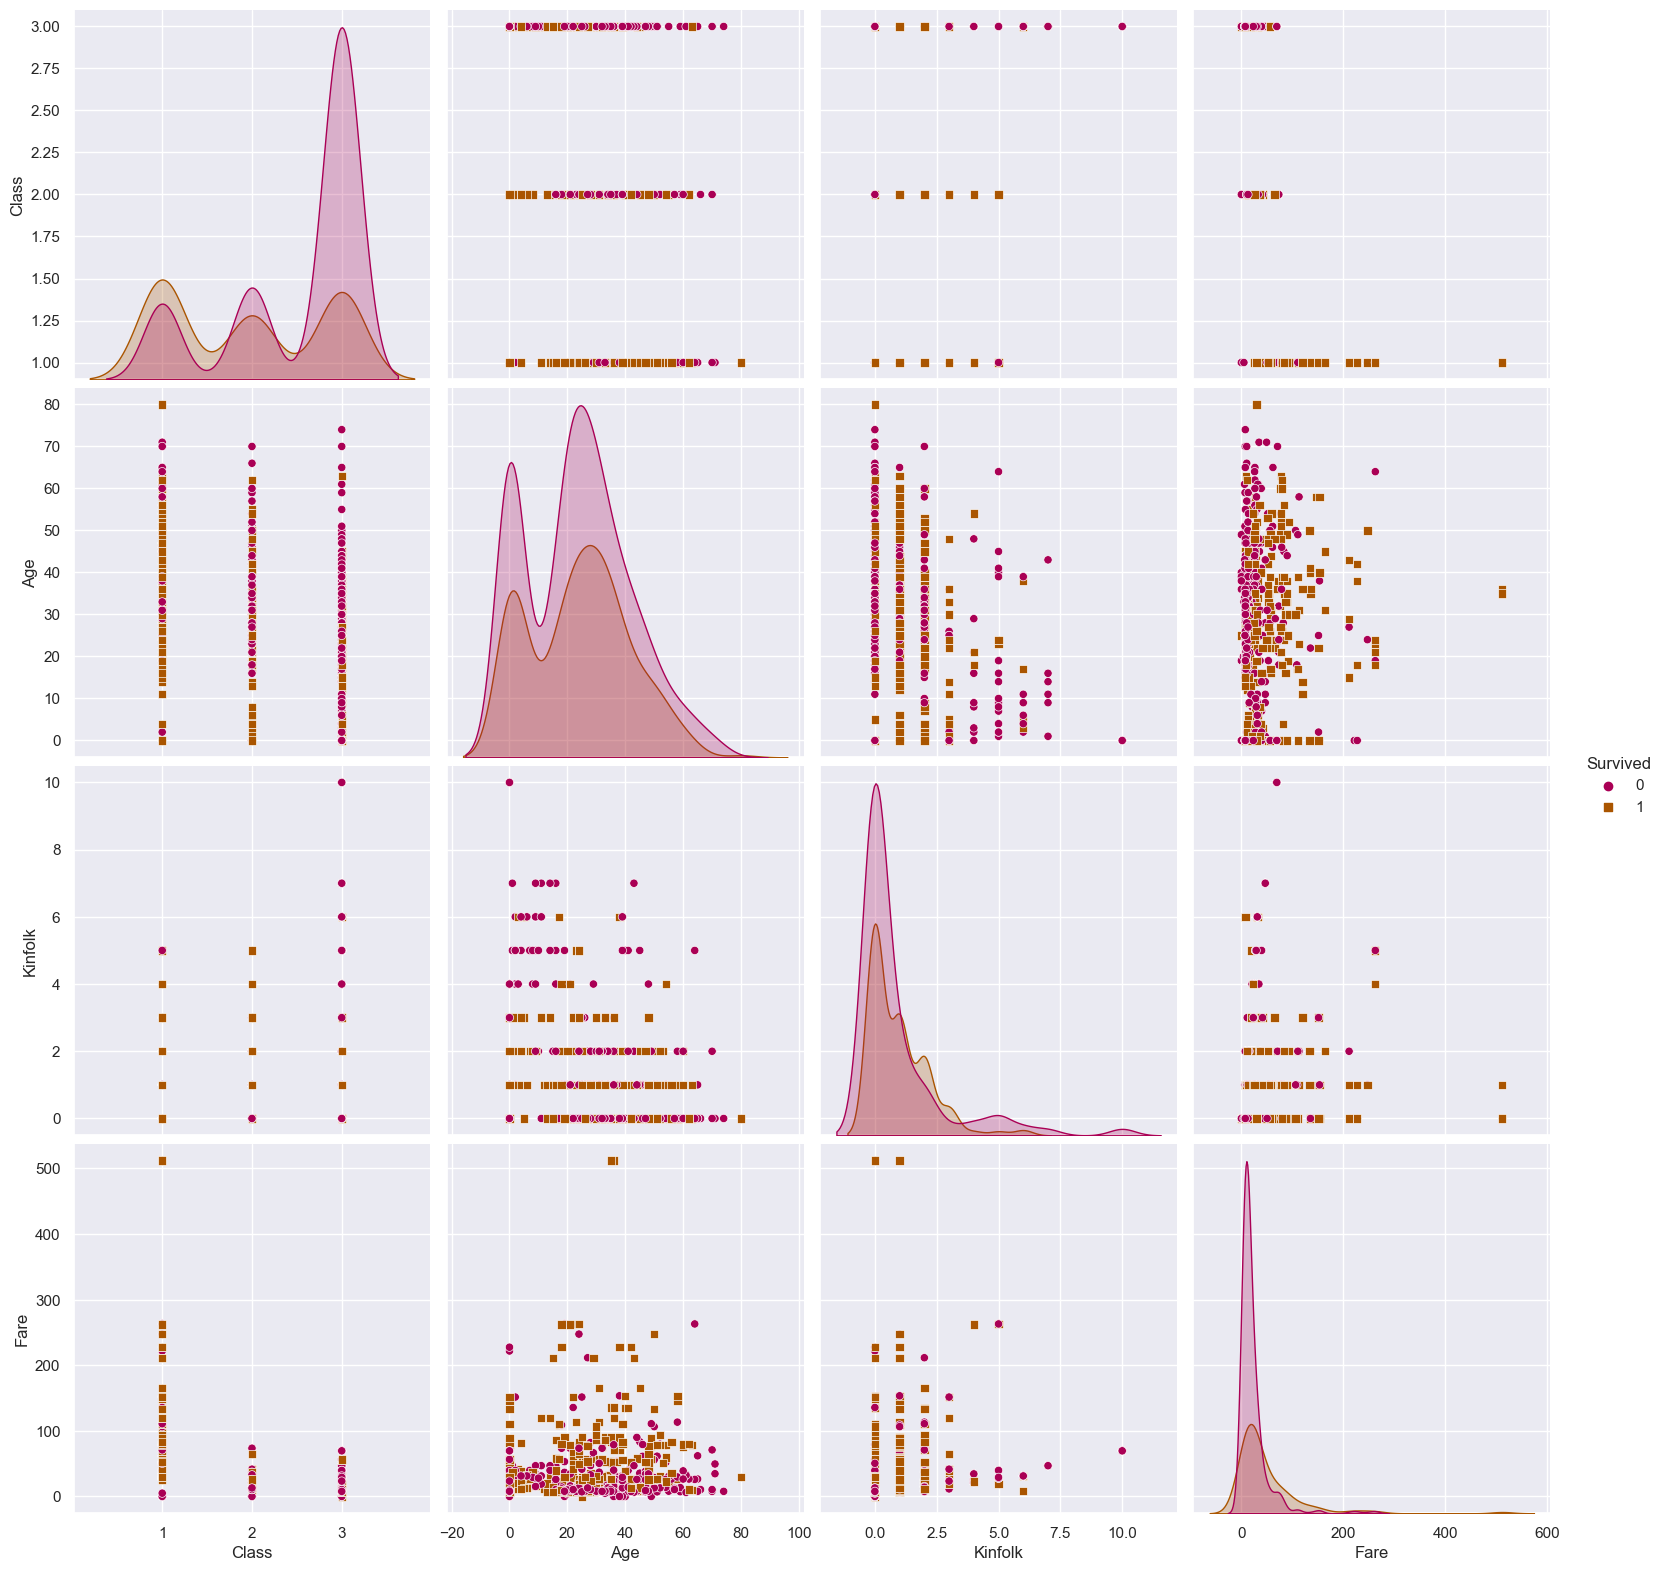

In [156]:
sns.pairplot(normalizado, hue="Survived", dropna= True, height= 4,
             markers=["o", "s"], palette= 'brg')

In [77]:
temp= normalizado[['Sex', 'Survived']]
temp.Sex.replace('male',1, inplace= True)
temp.Sex.replace('female',0, inplace= True)

C:\Users\usuario\AppData\Local\Temp\ipykernel_7656\1990718316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.Sex.replace('male',1, inplace= True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_7656\1990718316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.Sex.replace('female',0, inplace= True)


In [78]:
temp.corr()

,Sex,Survived
Sex,1.000000,-0.543351
Survived,-0.543351,1.000000


In [79]:
df.Kinfolk.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Kinfolk, dtype: int64

In [80]:
# df.sort_values('Kinfolk', ascending= False)

In [81]:
muestra= df.groupby(['Kinfolk'])


In [82]:
muestra.apply(lambda x: x.sort_values('Ticket'))### dentro de nuestras agrupaciones x cantidad de familiares, ordenamos cada grupo por boleto.
## esto nos da una idea aproximada de los grupos familiares, ya que existe una tendencia a tener el mismo ticket entre familiares.

### esto lo que nos muestra es que algunos grupos familiares tienen "invitados"
#no pertenecientes a su grupo familiar(sobrinos, primos, amigos,amantes,socios,empleados,etc).

Survived  Class  \
Kinfolk                        
0       257         1      1   
        759         1      1   
        504         1      1   
        110         0      1   
        475         0      1   
...               ...    ...   
10      201         0      3   
        324         0      3   
        792         0      3   
        846         0      3   
        863         0      3   

                                                          Name     Sex  Age  \
Kinfolk                                                                       
0       257                               Cherry, Miss. Gladys  female   30   
        759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female   33   
        504                              Maioni, Miss. Roberta  female   16   
        110                     Porter, Mr. Walter Chamberlain    male   47   
        475                        Clifford, Mr. George Quincy    male    0   
...                                                        ...     ...  ...   
10      201                                Sage, Mr. Frederick    male    0   
        324                           Sage, Mr. George John Jr    male    0   
        792                            Sage, Miss. Stella Anna  female    0   
        846                           Sage, Mr. Douglas Bullen    male    0   
        863                  Sage, Miss. Dorothy Edith "Dolly"  female    0   

             Kinfolk    Ticket   Fare Cabin Embarked  
Kinfolk                                               
0       257        0    110152  86.50   B77        S  
        759        0    110152  86.50   B77        S  
        504        0    110152  86.50   B79        S  
        110        0    110465  52.00  C110        S  
        475        0    110465  52.00   A14        S  
...              ...       ...    ...   ...      ...  
10      201       10  CA. 2343  69.55   NaN        S  
        324       10  CA. 2343  69.55   NaN        S  
        792       10  CA. 2343  69.55   NaN        S  
        846       10  CA. 2343  69.55   NaN        S  
        863       10  CA. 2343  69.55   NaN        S  

[891 rows x 10 columns]

In [83]:
muestra= df.groupby(['Ticket'])

In [84]:
muestra.get_group('CA 2144')

,Survived,Class,Name,Sex,Age,Kinfolk,Ticket,Fare,Cabin,Embarked
59,0,3,"Goodwin, Master. William Frederick",male,11,7,CA 2144,46.9,NaN,S
71,0,3,"Goodwin, Miss. Lillian Amy",female,16,7,CA 2144,46.9,NaN,S
386,0,3,"Goodwin, Master. Sidney Leonard",male,1,7,CA 2144,46.9,NaN,S
480,0,3,"Goodwin, Master. Harold Victor",male,9,7,CA 2144,46.9,NaN,S
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43,7,CA 2144,46.9,NaN,S
683,0,3,"Goodwin, Mr. Charles Edward",male,14,7,CA 2144,46.9,NaN,S


In [148]:
muestra= df.groupby(['Class','Kinfolk'])

In [149]:
temp= df.groupby(['Class','Kinfolk']).aggregate({'Kinfolk': ['count'],'Survived': ['sum']})### esto nos muestra por clase, cuantos familiares tenian los pasajeros que sobrevivieron.
# nos muestra la tendencia pronunciada de que a mayor cantidad de integrantes por familia, se dispara la tasa de mortalidad de sus integrantes.


In [150]:
temp.loc[[1]]
temp['Fallecidos']= temp.Kinfolk['count'] - temp.Survived['sum']
temp['Porcentaje']= temp.Fallecidos / temp.Fallecidos.sum()
## estos numeros nos muestran que una gran proporcion del total de fallecidos (alrededor del 67% del total de los fallecidos) pertenecian a la 3era clase, 

In [132]:
primera=temp.Porcentaje.loc[1].sum()
segunda=temp.Porcentaje.loc[2].sum()
tercera=temp.Porcentaje.loc[3].sum()

print(f'Porcentaje de fallecidos de 1era clase: {round((primera*100), 2)}%')
print(f'Porcentaje de fallecidos de 2da clase: {round((segunda*100), 2)}%')
print(f'Porcentaje de fallecidos de 3era clase: {round((tercera*100), 2)}%')
# total= primera + segunda + tercera ## corroboramos que los numeros coincidan

Porcentaje de fallecidos en 1era clase: 14.57%
Porcentaje de fallecidos en 2da clase: 17.67%
Porcentaje de fallecidos en 3era clase: 67.76%


In [135]:
temp.loc[[1][0]].Fallecidos.sum()

80

In [92]:
temp.Kinfolk['count'].sum()### corroboramos que nos de el total de pasajaeros registrados
temp.Survived['sum'].sum() ### corroboramos la cantidad de sobrevivientes al naufragio

342

ANOTACIONES DEL ANALISIS Y ESTUDIO QUE HICIMOS AL DATAFRAME:
- El analisis que realizamos al dataset, es un analisis descriptivo, ya que refiere a un caso puntual (hundimiento del titanic).
- en campo Age, reemplazamos los valores nan por 0, para poder transformar el campo a tipo int64, ya que es mas logico e intuitivo ese tipo de dato para la variable edad, y para poder realizar estadisticos basados en ese campo.
- existen pasajeros los cuales no pagaron pasaje, el valor de Fare es 0.0
- creamos una columna kinfolk(familiares) que representa las columnas patch y SibSp, y a estas las borramos (las dejamos guardadas en la variable 'borradas' por si acaso)